<b>Aktywność 8</b><br>
Niezbędne biblioteki: contextily, geopandas, matplotlib

<b>Ćwiczenie 1.</b> Wczytaj dane z plików ``TravelTimes_to_5975375_RailwayStation.shp``, ``metro.shp`` i ``roads.shp`` do obiektów typu GeoDataFrame o nazwach <i>grid</i>, <i>metro</i> i <i>roads</i>.

In [1]:
import geopandas as gpd

grid = gpd.read_file('TravelTimes_to_5975375_RailwayStation/TravelTimes_to_5975375_RailwayStation.shp')
metro = gpd.read_file('metro/metro.shp')
roads = gpd.read_file('roads/roads.shp')

<b>Ćwiczenie 2.</b> Sprawdź, czy wszystkie wartości CRS są identyczne. Jeżeli nie, to ujednolić je do wartości CRS ze zmiennej <i>grid</i>.

In [2]:
if grid.crs != metro.crs:
    metro = metro.to_crs(grid.crs)

if grid.crs != roads.crs:
    roads = roads.to_crs(grid.crs)

In [3]:
print('CRS:')
print(f"- grid: {grid.crs}")
print(f"- metro: {metro.crs}")
print(f"- roads: {roads.crs}")

CRS:
- grid: EPSG:3067
- metro: EPSG:3067
- roads: EPSG:3067


<b>Ćwiczenie 3.</b> Narysuj wykres na podstawie danych ze zmiennej <i>grid</i>.

<Axes: >

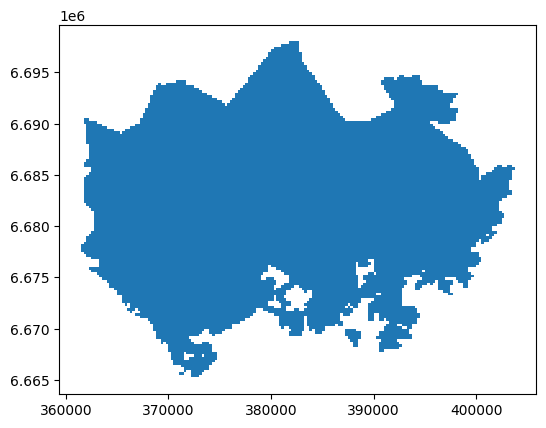

In [4]:
grid.plot()

<b>Ćwiczenie 4.</b> Narysuj wykres na podstawie kolumny <i>pt_r_t</i> ze zmiennej <i>grid</i>.

<Axes: >

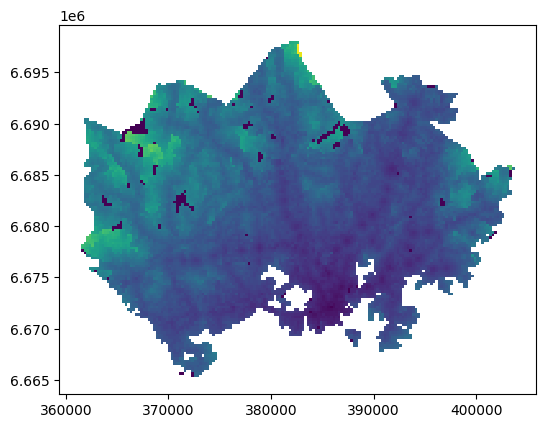

In [5]:
grid.plot(column='pt_r_t')

<b>Ćwiczenie 5.</b> Ustaw mapę kolorów Spectral.

<Axes: >

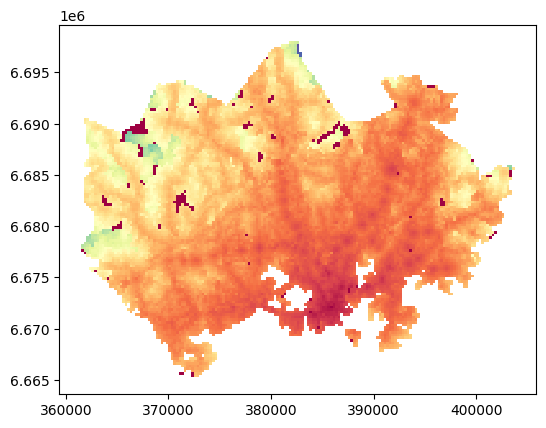

In [6]:
grid.plot(column='pt_r_t', cmap='Spectral')

<b>Ćwiczenie 6.</b> Ustaw podział danych na wykresie (klasyfikację) według kwantyli.

<Axes: >

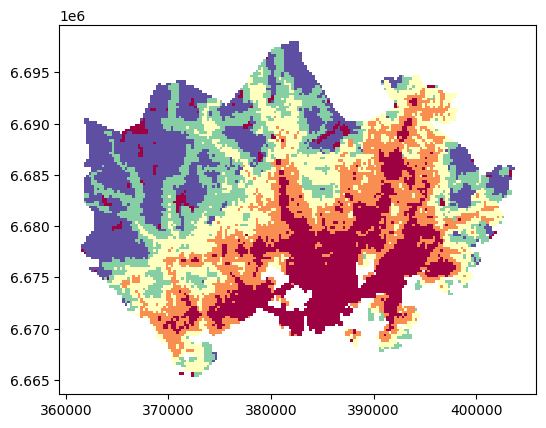

In [7]:
grid.plot(column='pt_r_t', cmap='Spectral', scheme='quantiles')

<b>Ćwiczenie 7.</b> Ustaw liczbę klas na 9.

<Axes: >

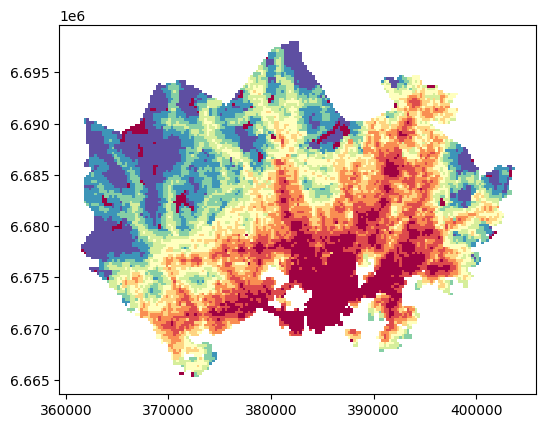

In [8]:
grid.plot(column='pt_r_t', cmap='Spectral', scheme='quantiles', k=9)

<b>Ćwiczenie 8.</b> Ustaw przezroczystość wykresu na 0.8.

<Axes: >

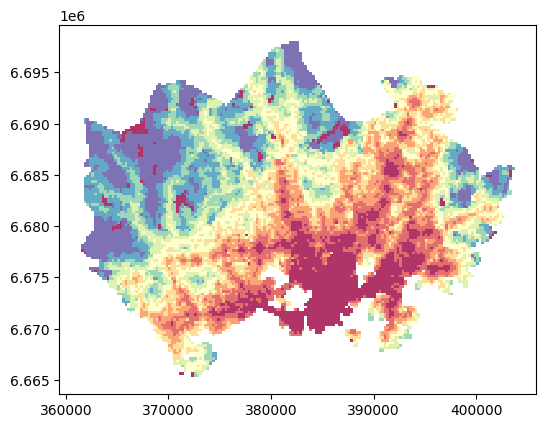

In [9]:
grid.plot(column='pt_r_t', cmap='Spectral', scheme='quantiles', k=9, alpha=0.8)

<b>Ćwiczenie 9.</b> Nanieś na jednym wykresie dane ze zmiennych <i>grid</i>, <i>roads</i> oraz <i>metro</i>. Metro zaznacz czerwonymi liniami o grubości 2, a drogi czarnymi liniami o grubości 1.

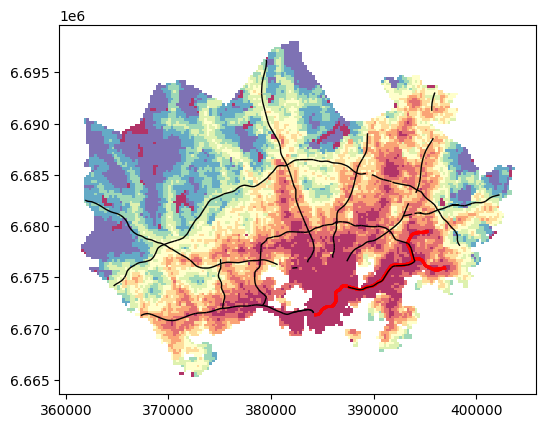

In [10]:
import matplotlib.pyplot as plt

ax = grid.plot(column='pt_r_t', cmap='Spectral', scheme='quantiles', k=9, alpha=0.8)

metro.plot(ax=ax, color='red', linewidth=2)
roads.plot(ax=ax, color='black', linewidth=1)
plt.show()

<b>Ćwiczenie 10.</b> Wyświetl legendę. Nadaj jej tytuł "Travel time (minutes)".

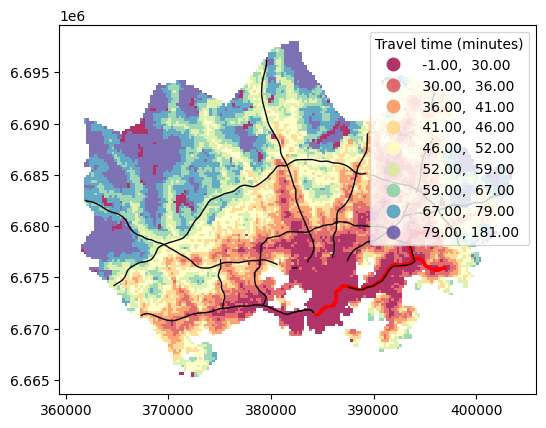

In [11]:
ax = grid.plot(column='pt_r_t', cmap='Spectral', scheme='quantiles', k=9, alpha=0.8, legend=True, legend_kwds={'title': 'Travel time (minutes)'})

metro.plot(ax=ax, color='red', linewidth=2)
roads.plot(ax=ax, color='black', linewidth=1)
plt.show()

<b>Ćwiczenie 11.</b> Przeprowadź projekcję danych ze zmiennej <i>grid</i> na EPSG:3857 (Web Mercator).

In [12]:
grid = grid.to_crs(epsg=3857)
metro = metro.to_crs(epsg=3857)
roads = roads.to_crs(epsg=3857)

<b>Ćwiczenie 12.</b> Nanieś na wykresie dane z kolumny <i>pt_r_t</i> ze zmiennej <i>grid</i>. Ustaw mapę kolorów RdYlBu, podział danych na wykresie (klasyfikację) według kwantyli, liczbę klas na 9 oraz przezroczystość wykresu na 0.8.

<Axes: >

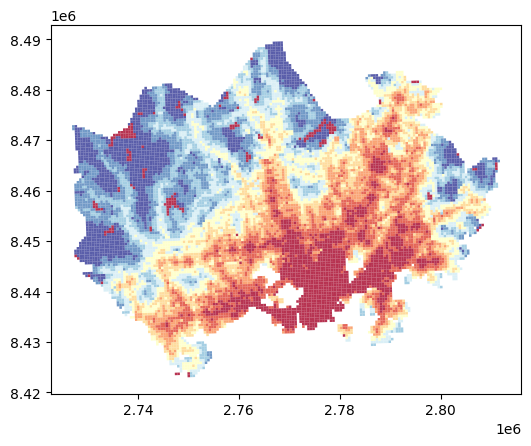

In [13]:
grid.plot(column='pt_r_t', cmap='RdYlBu', scheme='quantiles', k=9, alpha=0.8)

<b>Ćwiczenie 13.</b> Dodaj mapę bazową OpenStreetMap (Mapnik).

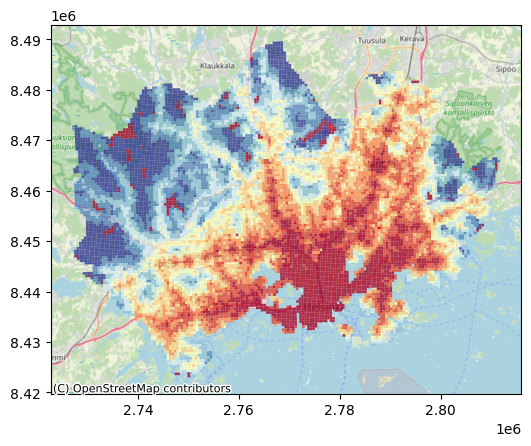

In [14]:
import contextily as ctx

ax = grid.plot(column='pt_r_t', cmap='RdYlBu', scheme='quantiles', k=9, alpha=0.8)
ctx.add_basemap(ax, source=ctx.providers.OpenStreetMap.Mapnik)
plt.show()

<b>Ćwiczenie 14.</b> Wybierz tylko te rekordy ze zmiennej <i>grid</i>, które w kolumnie <i>pt_r_t</i> mają wartości od 0 do 15 i zapisz je w zmiennej <i>grid2</i>.

In [15]:
grid2 = grid[(grid['pt_r_t'] >= 0) & (grid['pt_r_t'] <= 15)].copy()

<b>Ćwiczenie 15.</b> Nanieś na wykresie dane z kolumny <i>pt_r_t</i> ze zmiennej <i>grid2</i>. Ustaw mapę kolorów RdYlBu, podział danych na wykresie (klasyfikację) według kwantyli, liczbę klas na 5 oraz przezroczystość wykresu na 0.6. Dodaj mapę bazową OpenStreetMap (Mapnik).

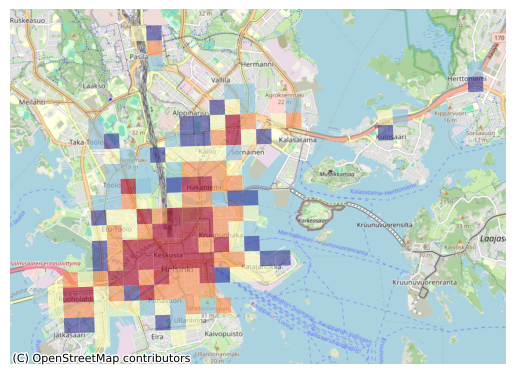

In [16]:
ax = grid2.plot(column='pt_r_t', cmap='RdYlBu', scheme='quantiles', k=5, alpha=0.6)
ctx.add_basemap(ax, source=ctx.providers.OpenStreetMap.Mapnik)
ax.set_axis_off()
plt.show()